In [57]:
COLOURS = ["red", "blue", "green", "yellow", "purple", "orange"]
MAX_NODES = len(COLOURS)

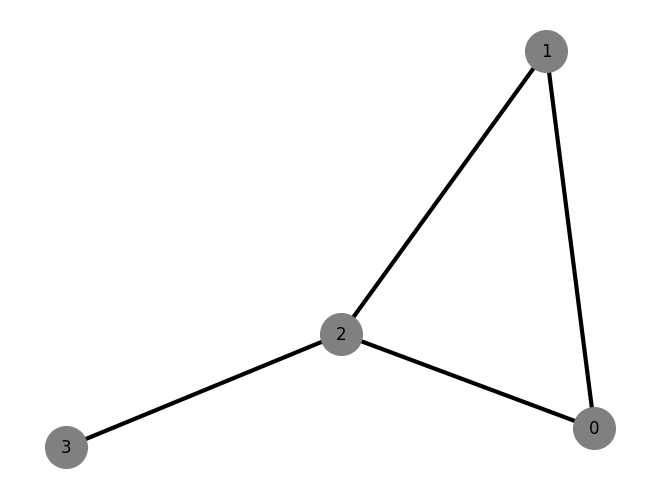


% allocate one colour to each node
1{colouring(Node, Colour): colour(Colour)}1 :- node(Node).

% filter out all colourings where two nodes connected by an edge have the same colour
:- edge(Node1, Node2), colouring(Node1, Colour), colouring(Node2, Colour).

% defining available colours
colour(purple).
colour(yellow).
colour(blue).

% defining nodes and edges
node(0).
node(1).
node(2).
node(3).
edge(0, 2).
edge(0, 1).
edge(1, 2).
edge(2, 3).



In [201]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_connected_graph(max_nodes: int):
    n = random.randint(3, max_nodes)
    G = nx.Graph()

    # Add nodes from 0 to n-1
    G.add_nodes_from(range(n))

    # First, create a spanning tree to ensure all nodes are connected
    nodes = list(G.nodes())
    random.shuffle(nodes)

    for i in range(n - 1):
        G.add_edge(nodes[i], nodes[i + 1])

    # Optionally, randomly add more edges to create a more complex connected graph
    for i in range(n):
        for j in range(i + 1, n):
            if not G.has_edge(i, j) and random.random() < 0.3:  # 30% chance to add an extra edge
                G.add_edge(i, j)

    return G

def plot_graph(G):
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='grey', node_size=900, edge_color='black', width=3)
    plt.show()

def generate_asp_facts(G):
    nodes = list(G.nodes())
    edges = list(G.edges())

    asp_facts = "% defining nodes and edges\n"

    for node in nodes:
        asp_facts += f"node({node}).\n"

    for edge in edges:
        asp_facts += f"edge({edge[0]}, {edge[1]}).\n"

    return asp_facts

# Maximum number of nodes
max_nodes = MAX_NODES

# Generate and plot the connected graph
G = generate_connected_graph(max_nodes)
plot_graph(G)

# Generate and print the ASP facts

def generate_color_facts(nodes_count: int, color_selection: list[str] | None = None):
    color_facts = "% defining available colours\n"
    if not color_selection:
        colors = COLOURS


        number_of_colors = random.randint(2, nodes_count)
        color_selection = random.sample(colors, number_of_colors)
    for color in color_selection:
        color_facts += f"colour({color}).\n"

    color_facts += "\n"
    return color_facts

def base_asp():
    return """
    % allocate one colour to each node
    1{colouring(Node, Colour): colour(Colour)}1 :- node(Node).

    % filter out all colourings where two nodes connected by an edge have the same colour
    :- edge(Node1, Node2), colouring(Node1, Colour), colouring(Node2, Colour).

    """

asp = base_asp()
color_facts = generate_color_facts(G.nodes.__len__())
asp_facts = generate_asp_facts(G)

asp_code = asp + color_facts + asp_facts
asp_code = asp_code.replace("    ", "")
print(asp_code)


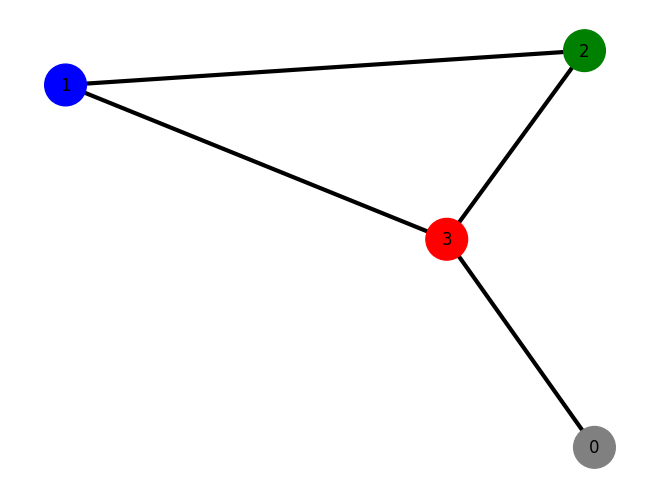


% allocate one colour to each node
1{colouring(Node, Colour): colour(Colour)}1 :- node(Node).

% filter out all colourings where two nodes connected by an edge have the same colour
:- edge(Node1, Node2), colouring(Node1, Colour), colouring(Node2, Colour).

% defining colored node facts

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(1,blue).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(2,green).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colouring(0,COLOUR).

% outputing the answer
#show answer/1.

colouring(3,red).

% define the answer as the colour of the grey node
1 { colouring(0,COLOUR) : colour(COLOUR) } 1.
answer(COLOUR) :- colou

In [214]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_connected_graph(max_nodes: int):
    n = random.randint(3, max_nodes)
    G = nx.Graph()

    # Add nodes from 0 to n-1
    G.add_nodes_from(range(n))

    # First, create a spanning tree to ensure all nodes are connected
    nodes = list(G.nodes())
    random.shuffle(nodes)

    for i in range(n - 1):
        G.add_edge(nodes[i], nodes[i + 1])

    # Optionally, randomly add more edges to create a more complex connected graph
    for i in range(n):
        for j in range(i + 1, n):
            if not G.has_edge(i, j) and random.random() < 0.3:  # 30% chance to add an extra edge
                G.add_edge(i, j)

    return G

def assign_colors(G):
    # Use NetworkX coloring algorithm to assign colors
    color_map = nx.coloring.greedy_color(G, strategy='largest_first')

    # Convert color assignments to a list of node colors
    color_palette = COLOURS

    node_colors = [color_palette[color_map[node]] for node in G.nodes()]
    grey_node = random.choice(list(G.nodes()))
    original_node_colors = node_colors.copy()
    node_colors[grey_node] = 'grey'

    edge_colors = 'black'  # Set a default color for edges

    return node_colors, edge_colors, original_node_colors

def plot_graph(G, node_colors, edge_colors):
    pos = nx.spring_layout(G)  # positions for all nodes

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=900, edge_color=edge_colors, width=3)
    plt.show()

# Maximum number of nodes
max_nodes = 5

# Generate and plot the connected graph
G = generate_connected_graph(max_nodes)
node_colors, edge_colors, original_node_colors = assign_colors(G)
plot_graph(G, node_colors, edge_colors)

def generate_colouring_facts(node_colors: list[str]):
    asp = "% defining colored node facts\n"
    asp_rule = None
    for i, color in enumerate(node_colors):
        if color != "grey":
            asp += f"colouring({i},{color}).\n"
        else:
            asp_rule = f"""
                % define the answer as the colour of the grey node
                1 {{ colouring({i},COLOUR) : colour(COLOUR) }} 1.
                answer(COLOUR) :- colouring({i},COLOUR).

                % outputing the answer
                #show answer/1.

                """
        asp += asp_rule if asp_rule else ""

    return asp


asp = base_asp()
colouring_facts = generate_colouring_facts(node_colors)
colour_facts = generate_color_facts(0, color_selection=set(original_node_colors))
asp_facts = generate_asp_facts(G)

asp_code = asp + colouring_facts + colour_facts + asp_facts
# remove identation
asp_code = asp_code.replace("    ", "")

print(asp_code)